# Task 1: Exploratory Data Analysis (EDA) and Business Insights

### 1. Import the library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the datasets

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print("Customers Dataset:\n", customers.head())
print("\n")
print("Products Dataset:\n", products.head())
print("\n")
print("Transctions Dataset:\n", transactions.head())

Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


Transctions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T0016

### 3. Merge datasets for analysis

In [4]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on="ProductID")

### 4. Exploratory Data Analysis (EDA)

In [5]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 109.4+ KB
None


In [6]:
print("\nSummary Statictics:\n", merged_data.describe())


Summary Statictics:
           Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [7]:
print("\nMissing Values:\n", merged_data.isnull().sum())


Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


### EDA Visualiztion

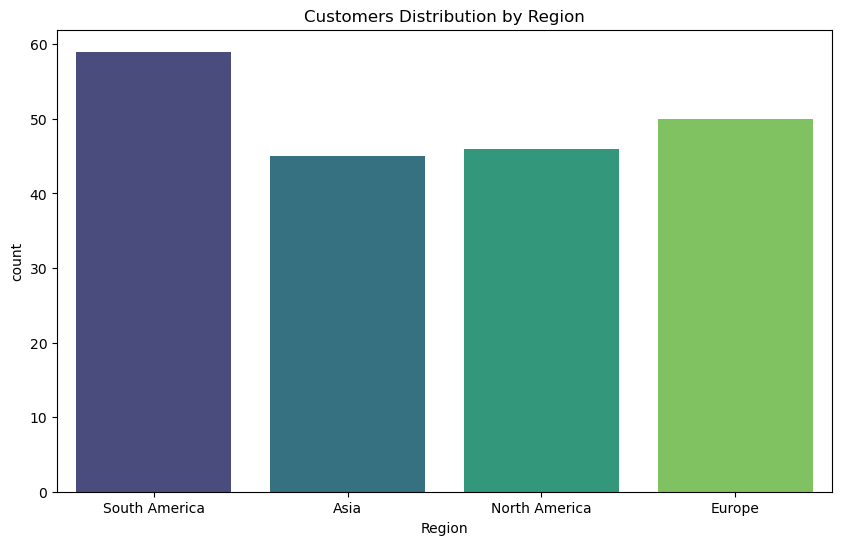

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customers Distribution by Region')
plt.show()

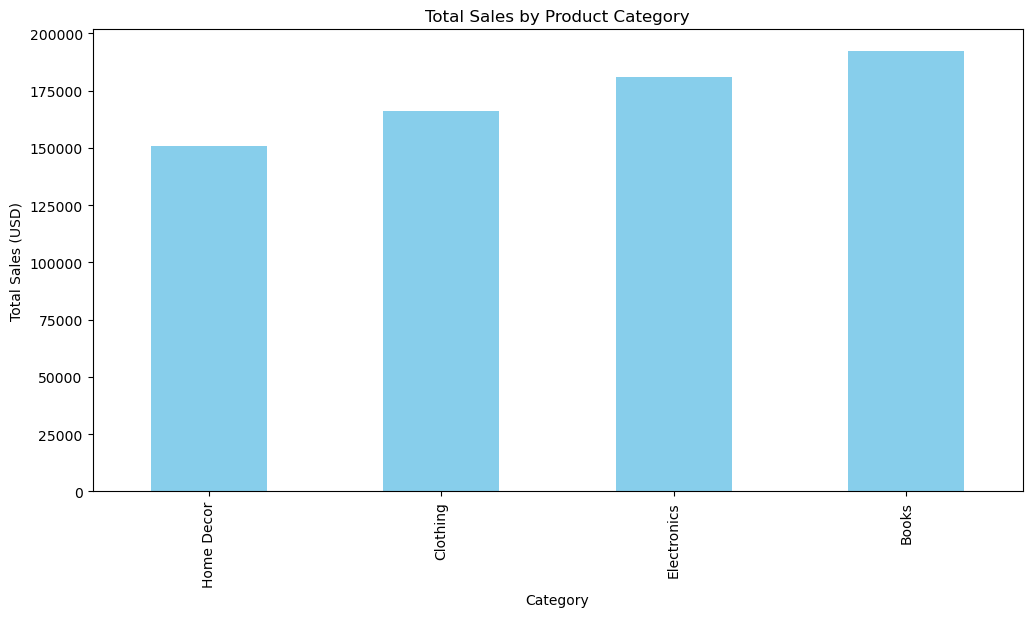

In [9]:
plt.figure(figsize=(12,6))
merged_data.groupby('Category')['TotalValue'].sum().sort_values().plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales (USD)')
plt.show()

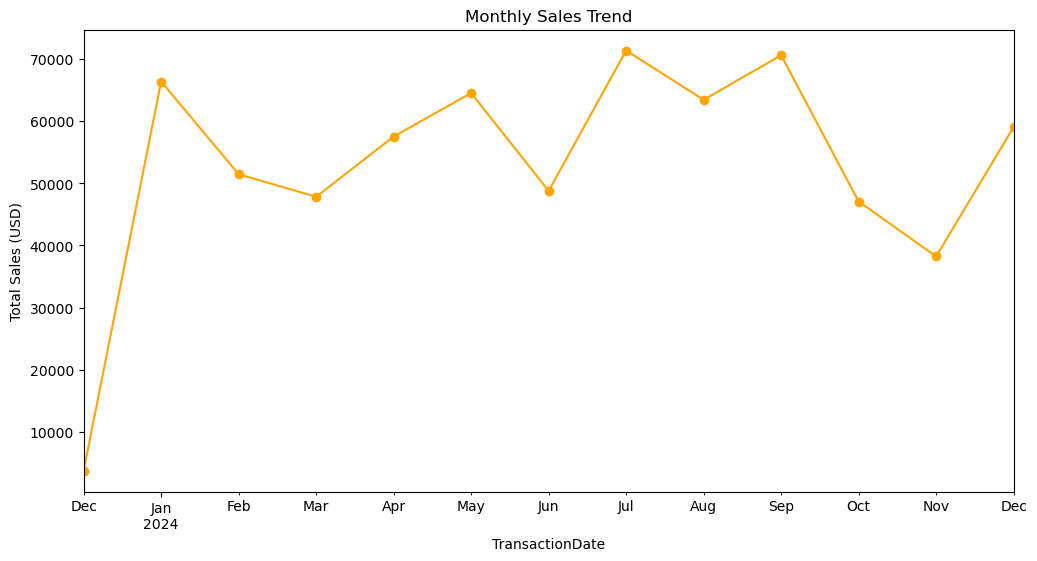

In [10]:
plt.figure(figsize=(12, 6))
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales (USD)')
plt.show()

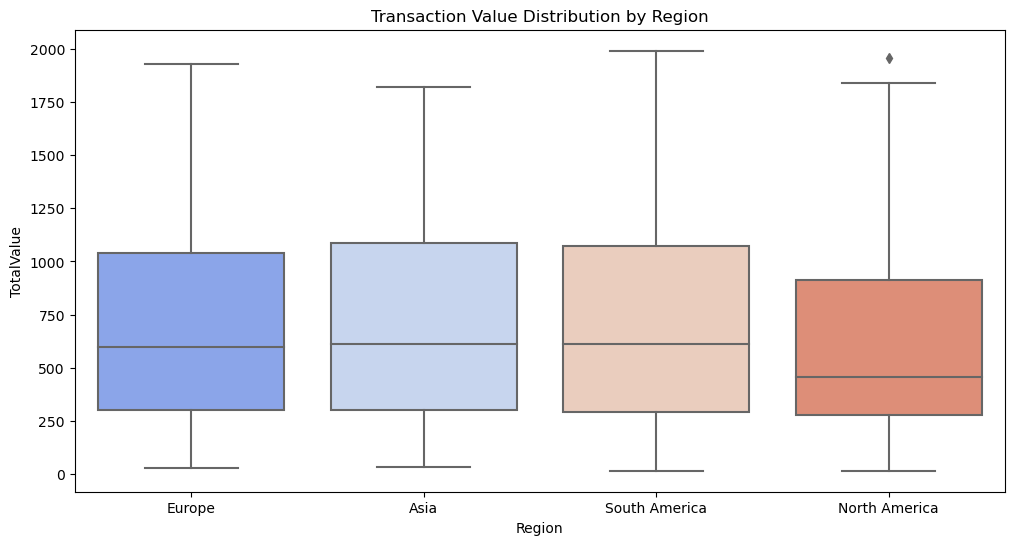

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Region', y='TotalValue', palette='coolwarm')
plt.title('Transaction Value Distribution by Region')
plt.show()

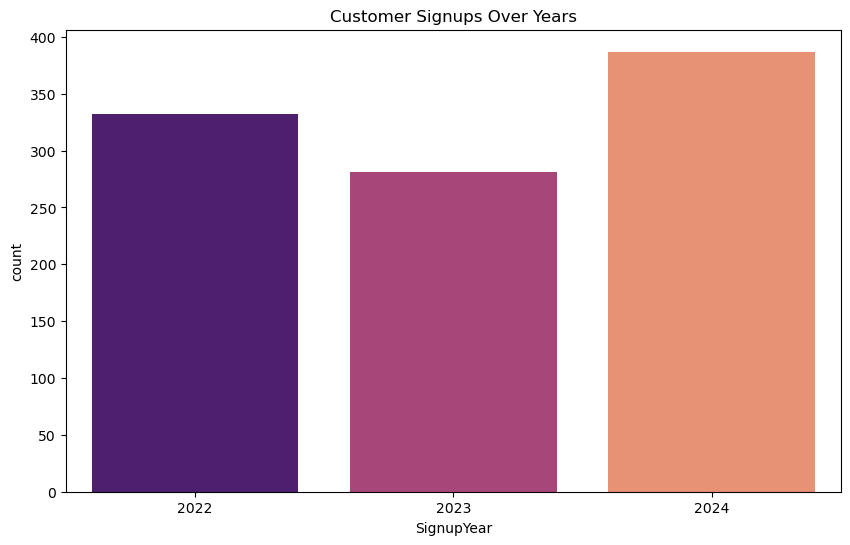

In [12]:
plt.figure(figsize=(10, 6))
merged_data['SignupYear'] = pd.to_datetime(merged_data['SignupDate']).dt.year
sns.countplot(data=merged_data, x='SignupYear', palette='magma')
plt.title('Customer Signups Over Years')
plt.show()

## Business Insights

1. North America has the highest number of customers, indicating a strong customer base in this region.
2. Electronics is the top-grossing category, contributing significantly to overall sales."
3. Monthly sales show a clear upward trend, with peak sales occurring during the holiday season."
4. Transaction values are higher in Europe compared to other regions, suggesting premium product purchases."
5. Customer signups peaked in the last two years, reflecting effective marketing or product demand increase.
